MSE = 0.6625380457491551


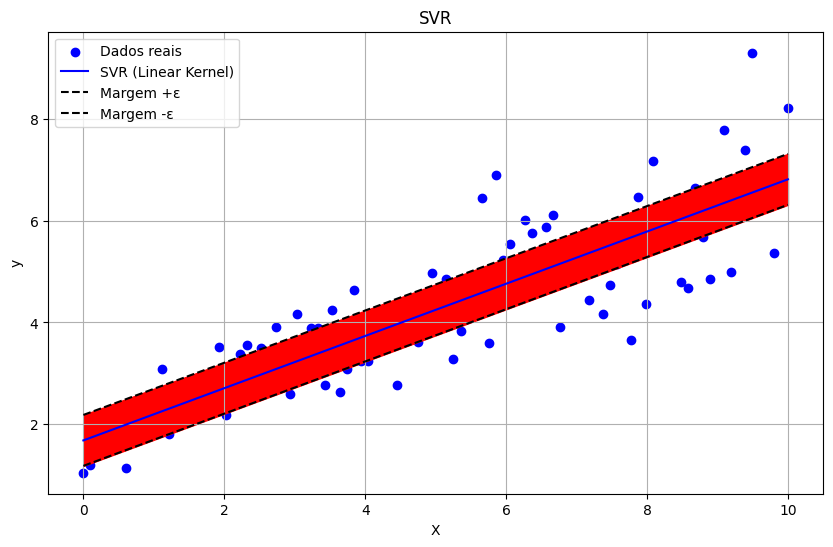

In [1]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

M = 100

def generate_synthetic_data():
    # linspace gera um array 1d com valores de 0 a 10
    # reshape muda a dimensão do array, transformando num array de dimensão 50 x 1
    X = np.linspace(0, 10, M)
    y = 0.5 * X + 2 + np.random.normal(0, 0.7, M)
    return (X.reshape(-1, 1), y)


X, y = generate_synthetic_data()

svr = SVR(kernel="linear", C=10, epsilon=.5)
svr.fit(X, y)
y_pred = svr.predict(X)

print(f"MSE = {mean_squared_error(y, y_pred)}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Dados reais")
plt.plot(X, y_pred, color="blue", label="SVR (Linear Kernel)")
plt.plot(X, y_pred + svr.epsilon, "k--", label="Margem +ε")
plt.plot(X, y_pred - svr.epsilon, "k--", label="Margem -ε")
plt.fill_between(X.ravel(), y_pred - svr.epsilon, y_pred + svr.epsilon, color="red")

plt.autoscale()
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR")
plt.legend()
plt.grid(True)
plt.show()
